Simple Test of Lending Club Cleaning in Pandas
----------------------------------------------

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import math

%matplotlib inline

loansData = pd.read_csv('https://spark-public.s3.amazonaws.com/dataanalysis/loansData.csv')

In [2]:
loansData.dropna(inplace=True)

In [3]:
loansData.dtypes

Amount.Requested                    int64
Amount.Funded.By.Investors        float64
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

In [4]:
loansData.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
81174,20000,20000,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14,14272,2,< 1 year
99592,19200,19200,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12,11140,1,2 years
80059,35000,35000,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14,21977,1,2 years
15825,10000,9975,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10,9346,0,5 years
33182,12000,12000,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11,14469,0,9 years


In [5]:
loansData['Interest.Rate'] = loansData.apply(lambda x: pd.Series(x['Interest.Rate'].rstrip('%')).astype('float')/100, axis=1)
loansData['Loan.Length'] = loansData.apply(lambda x: pd.Series(x['Loan.Length'].rstrip(' months')).astype('int'), axis=1)

In [6]:
loansData.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
81174,20000,20000,0.0890,36,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14,14272,2,< 1 year
99592,19200,19200,0.1212,36,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12,11140,1,2 years
80059,35000,35000,0.2198,60,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14,21977,1,2 years
15825,10000,9975,0.0999,36,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10,9346,0,5 years
33182,12000,12000,0.1171,36,credit_card,18.78%,NJ,RENT,3195.00,695-699,11,14469,0,9 years


In [7]:
loansData['FICO.Min'] = loansData.apply(lambda x: pd.Series(x['FICO.Range'].split('-')[0:1]).astype('int'), axis=1)

In [8]:
loansData.dtypes

Amount.Requested                    int64
Amount.Funded.By.Investors        float64
Interest.Rate                     float64
Loan.Length                         int64
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
FICO.Min                            int64
dtype: object

In [9]:
def splitScores(bin):
  return pd.Series(bin.split('-')[0:2]).astype('int')

loansData[['FICO.Min', 'FICO.Max']] = loansData.apply(lambda x: splitScores(x['FICO.Range']), axis=1)
loansData['FICO.Mean'] = loansData[['FICO.Min', 'FICO.Max']].mean(axis=1)

#loansData = loansData.drop(['FICO.Min', 'FICO.Max'], axis=1)

In [10]:
loansData.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,FICO.Min,FICO.Max,FICO.Mean
81174,20000,20000,0.0890,36,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14,14272,2,< 1 year,735,739,737
99592,19200,19200,0.1212,36,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12,11140,1,2 years,715,719,717
80059,35000,35000,0.2198,60,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14,21977,1,2 years,690,694,692
15825,10000,9975,0.0999,36,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10,9346,0,5 years,695,699,697
33182,12000,12000,0.1171,36,credit_card,18.78%,NJ,RENT,3195.00,695-699,11,14469,0,9 years,695,699,697


In [11]:
loansData.dtypes

Amount.Requested                    int64
Amount.Funded.By.Investors        float64
Interest.Rate                     float64
Loan.Length                         int64
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
FICO.Min                            int64
FICO.Max                            int64
FICO.Mean                         float64
dtype: object

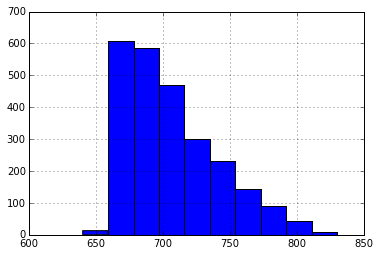

In [12]:
plt.figure()
p = loansData['FICO.Min'].hist()
plt.show()

/Library/Python/2.7/site-packages/pandas/tools/plotting.py:2625: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  warnings.warn(msg, FutureWarning)


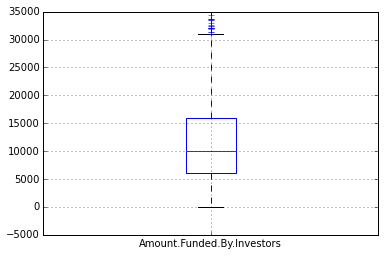

In [13]:
loansData.boxplot(column='Amount.Funded.By.Investors')

plt.show()

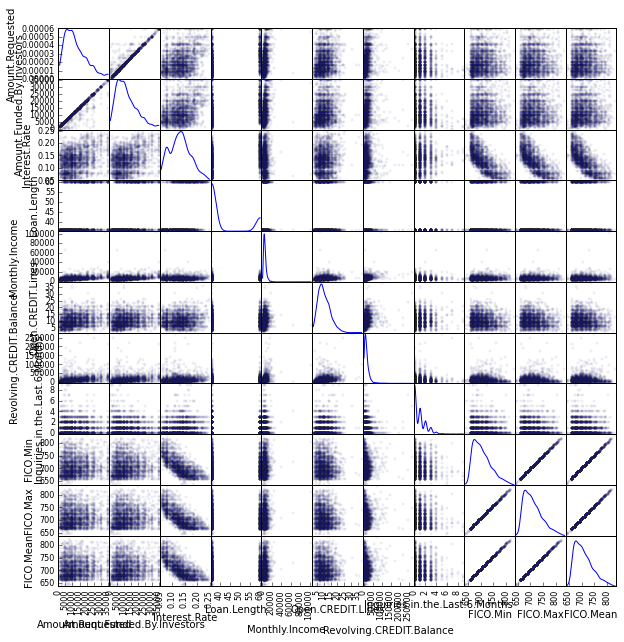

In [14]:
plt.figure()
a = pd.scatter_matrix(loansData, alpha=0.05, figsize=(10,10), diagonal='kde')

In [15]:
intrate = loansData['Interest.Rate']
loanamt = loansData['Amount.Requested']
fico = loansData['FICO.Min']

In [16]:
# The dependent variable
y = np.matrix(intrate).transpose()
# The independent variables shaped as columns
x1 = np.matrix(fico).transpose()
x2 = np.matrix(loanamt).transpose()

In [17]:
x = np.column_stack([x1,x2])

In [18]:
X = sm.add_constant(x)
model = sm.OLS(y,X)
f = model.fit()

In [19]:
print 'Coefficients: ', f.params[0:2]
print 'Intercept: ', f.params[2]
print 'P-Values: ', f.pvalues
print 'R-Squared: ', f.rsquared

Coefficients:  [ 0.72987853 -0.00088594]
Intercept:  2.1084989051e-06
P-Values:  [  0.00000000e+000   0.00000000e+000   4.56770361e-203]
R-Squared:  0.656910844002


In [20]:
f.params

array([  7.29878535e-01,  -8.85938963e-04,   2.10849891e-06])

In [21]:
f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     2389.
Date:                Wed, 25 Mar 2015   Prob (F-statistic):               0.00
Time:                        20:40:50   Log-Likelihood:                 5724.1
No. Observations:                2498   AIC:                        -1.144e+04
Df Residuals:                    2495   BIC:                        -1.142e+04
Df Model:                           2                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.7299      0.010     73.765      0.000         0.710     0.749
x1            -0.0009    1.4e-05    -63.059      0.000        -0.001    -0.001
x2          2.108e-06    6.3e-08     33.457      0.000      1.98e-06  2.23e-06
==============================================================================
Omnibus:                       69.899   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.457
Skew:                           0.380   Prob(JB):                     9.19e-18
Kurtosis:                       3.421   Cond. No.                     2.96e+05
==============================================================================

Warnings:
[1] The condition number is large, 2.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
loansData['10K.Predict'] = loansData.apply(lambda x: f.params[0] + f.params[1]*x['Interest.Rate'] + f.params[2]*10000, axis=1)
loansData['30K.Predict'] = loansData.apply(lambda x: f.params[0] + f.params[1]*x['Interest.Rate'] + f.params[2]*30000, axis=1)

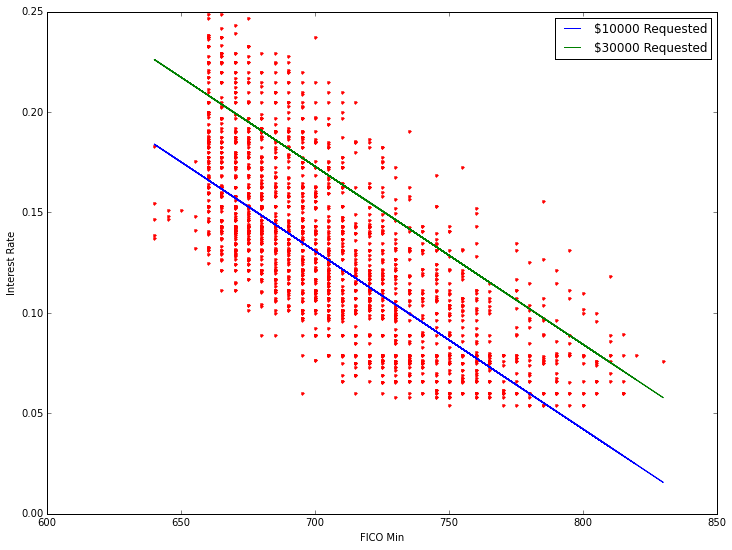

In [23]:
plt.figure(figsize=(12,9))
plt.plot(fico, intrate, 'r.') #plots a scatterplot where fico is the x-value, intrate is the y value, and 'r.' tells the points to be red dots
plt.plot(fico, f.params[0] + f.params[1]*fico + f.params[2]*10000, '-', label='$10000 Requested') #plot linear fit of intrate vs fico where amount.requested = 10000
plt.plot(fico, f.params[0] + f.params[1]*fico + f.params[2]*30000, '-', label='$30000 Requested') #plot linear fit of intrate vs fico where amount.requested = 30000
plt.xlabel('FICO Min')
plt.ylabel('Interest Rate')
plt.legend(loc="best")
plt.show()

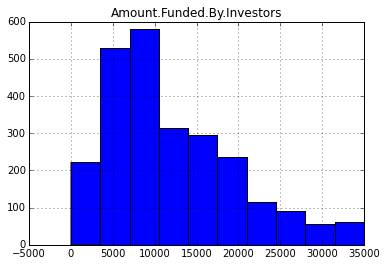

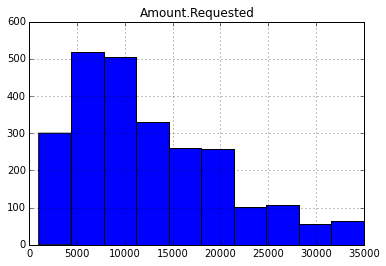

In [24]:
plt.figure()
loansData.hist(column='Amount.Funded.By.Investors')
loansData.hist(column='Amount.Requested')
plt.show()

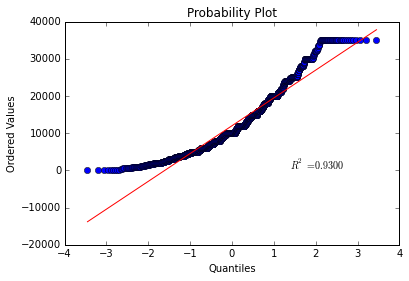

In [25]:
import scipy.stats as stats

plt.figure()
graph = stats.probplot(loansData['Amount.Funded.By.Investors'], dist="norm", plot=plt)
plt.show()

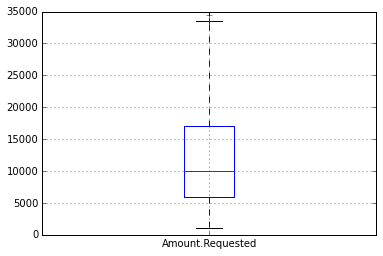

In [26]:
loansData.boxplot(column='Amount.Requested')

plt.show()

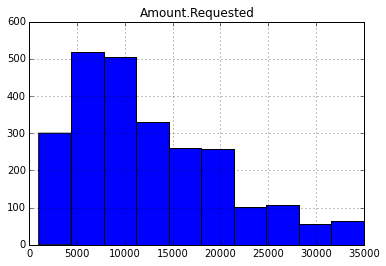

In [27]:
loansData.hist(column='Amount.Requested')
plt.show()

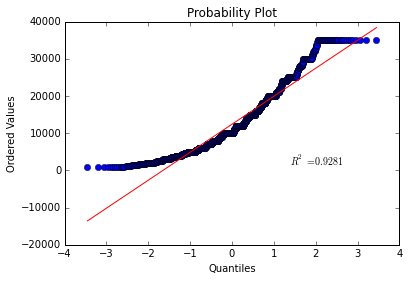

In [28]:
plt.figure()
graph = stats.probplot(loansData['Amount.Requested'], dist="norm", plot=plt)
plt.show()

In [29]:
dfLoansClean = pd.read_csv('loansData_clean.csv')

In [30]:
dfLoansClean.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,FICO.Score
0,20000,20000,8.90,36,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14,14272,2,< 1 year,735
1,19200,19200,12.12,36,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12,11140,1,2 years,715
2,35000,35000,21.98,60,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14,21977,1,2 years,690
3,10000,9975,9.99,36,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10,9346,0,5 years,695
4,12000,12000,11.71,36,credit_card,18.78%,NJ,RENT,3195.00,695-699,11,14469,0,9 years,695


In [31]:
dfLoansClean['Low.Interest.Flag'] = 0

dfLoansClean.ix[(dfLoansClean['Interest.Rate'] <= 12), 'Low.Interest.Flag'] = 1
#dfLoansClean.ix[(dfLoansClean['Amount.Funded.By.Investors'] == 10000) & (dfLoansClean['Interest.Rate'] <= 12), 'Low.Interest.Flag'] = 1

In [32]:
dfLoansClean['Low.Interest.Flag'].value_counts()

0    1508
1     992
dtype: int64

In [33]:
# this is used only when low interest is a boolean for exploratory purposes.
# we change to a categorical (0 / 1) when we are doing the logit model.
dfLoansClean[['Interest.Rate','Amount.Requested','FICO.Score']][dfLoansClean['Low.Interest.Flag'] == 1]

,Interest.Rate,Amount.Requested,FICO.Score
0,8.90,20000,735
3,9.99,10000,695
4,11.71,12000,695
6,7.90,10000,720
9,6.91,7000,715
13,8.90,35000,735
14,7.62,9600,725
17,10.37,14000,740
18,9.76,10000,730
19,9.99,5200,760


In [34]:
#creation of Intercept Constant
dfLoansClean['Intercept.Constant'] = 1.0

#list of independent variables
ind_vars = ['Intercept.Constant','FICO.Score','Amount.Requested']

#define the logistic regression model
logit = sm.Logit(dfLoansClean['Low.Interest.Flag'], dfLoansClean[ind_vars])

#fit the model
result = logit.fit()

#get the fitted coefficients from the results
coeff = result.params

print coeff

Optimization terminated successfully.
         Current function value: 0.319503
         Iterations 8
Intercept.Constant   -60.125045
FICO.Score             0.087423
Amount.Requested      -0.000174
dtype: float64


In [37]:
def logistic_function(FicoScore, LoanAmount, intercept, const_a, const_b, plusMinus=True):
    if plusMinus: #add the denominator
        p = 1 / (1 + math.e**(intercept + const_a * (FicoScore) + const_b * (LoanAmount)))
    else:
        p = 1 / (1 + math.e**-(intercept + const_a * (FicoScore) + const_b * (LoanAmount)))
    return p

In [38]:
logistic_function(720, 10000, coeff['Intercept.Constant'], coeff['FICO.Score'], coeff['Amount.Requested'])

0.25362141104848546

In [40]:
logistic_function(550, 10000, coeff['Intercept.Constant'], coeff['FICO.Score'], coeff['Amount.Requested'], False)

1.0335021485356849e-06

In [50]:
plusLogisticCurve = {}
plusLogisticCurve['prob'] = [logistic_function(x, 10000, coeff['Intercept.Constant'], coeff['FICO.Score'], coeff['Amount.Requested']) for x in range(550,950,2)]
plusLogisticCurve['FICO'] = [x for x in range(550,950,2)]

In [51]:
minusLogisticCurve = {}
minusLogisticCurve['prob'] = [logistic_function(x, 10000, coeff['Intercept.Constant'], coeff['FICO.Score'], coeff['Amount.Requested'], False) for x in range(550,950,2)]
minusLogisticCurve['FICO'] = [x for x in range(550,950,2)]

In [52]:
len(plusLogisticCurve['prob'])

200

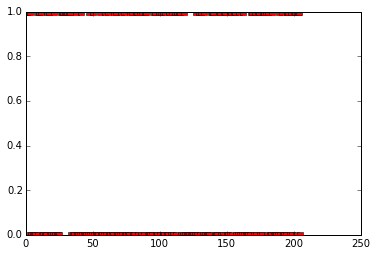

In [53]:
plt.plot(dfLoansClean.ix[(dfLoansClean['Amount.Requested'] == 10000), 'Low.Interest.Flag'], 'rs')
plt.show()

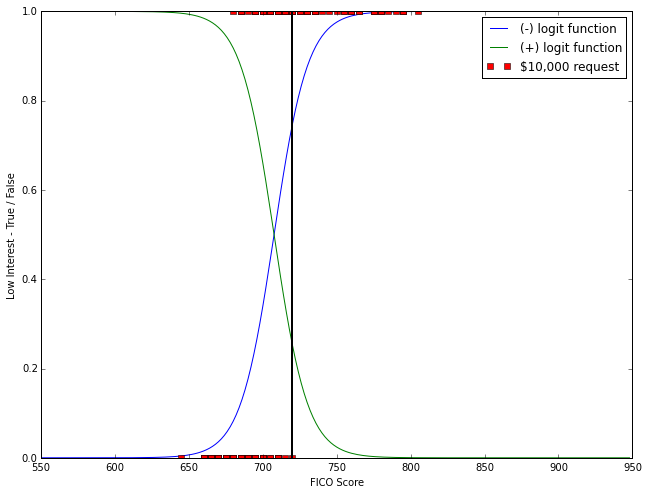

In [55]:
observed10K = dfLoansClean.ix[(dfLoansClean['Amount.Requested'] == 10000), 'Low.Interest.Flag']
FICO10K = dfLoansClean.ix[(dfLoansClean['Amount.Requested'] == 10000), 'FICO.Score']

plt.figure(figsize=(10.6, 8))
plt.plot(minusLogisticCurve['FICO'], minusLogisticCurve['prob'], 'b-', label='(-) logit function')
plt.plot(plusLogisticCurve['FICO'], plusLogisticCurve['prob'], 'g-', label='(+) logit function')
plt.plot(FICO10K, observed10K, 'rs', label='$10,000 request')
plt.xlim(550, 950)
plt.legend(loc="best")
plt.xlabel("FICO Score")
plt.ylabel("Low Interest - True / False")

# add a vline for FICO = 720
plt.axvline(720, color='black', linewidth=2)

plt.show()